## Personalized Medical Recommendation system with using Maching Learning

### Load datasets


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
dataset = pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\Training.csv")
dataset.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [50]:
dataset.shape

(4920, 133)

### train test split

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [52]:
X=dataset.drop("prognosis",axis=1)
y=dataset['prognosis']

In [53]:
X.describe

<bound method NDFrame.describe of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0          

In [54]:
y.describe

<bound method NDFrame.describe of 0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object>

In [55]:
le=LabelEncoder()
le.fit(y)
Y=le.transform(y)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [57]:
X_test.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4037,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_train.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
180,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2475,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

# Training Models

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
#create a dictionary  to store models
models={
    "SVC":SVC(kernel='linear'),
    "RandomForest":RandomForestClassifier(n_estimators=100,random_state=42),
    "GradientBoosting":GradientBoostingClassifier(n_estimators=100,random_state=42),
    "KNeighbors":KNeighborsClassifier(n_neighbors=5),
    "MultinominalNB":MultinomialNB()
}


In [62]:
# Evaluate models
evaluation_results = []
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [63]:

for model_name,model in models.items():
    #train models
    model.fit(X_train,y_train)


    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") and model.predict_proba(X_test).shape[1] > 1 else None

    #calculate metrices
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr") if hasattr(model, "predict_proba") else None
    
    evaluation_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

    # Print metrics
    print(" ")
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
    
    # # Plot ROC curve if applicable
    # if y_prob is not None:
    #     fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    #     plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    #calculate confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print(" ")

 
SVC Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 31]]
 
 
RandomForest Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 31]]
 
 
GradientBoosting Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  0  0 ...  0  0 31]]
 
 
KNeighbors Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
[[40  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  

In [64]:

results_df = pd.DataFrame(evaluation_results)
print(results_df)

              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0               SVC       1.0        1.0     1.0       1.0      NaN
1      RandomForest       1.0        1.0     1.0       1.0      1.0
2  GradientBoosting       1.0        1.0     1.0       1.0      1.0
3        KNeighbors       1.0        1.0     1.0       1.0      1.0
4    MultinominalNB       1.0        1.0     1.0       1.0      1.0


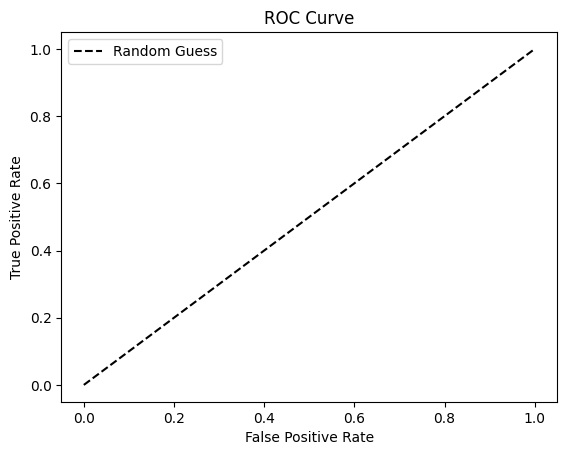

In [65]:
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [66]:
best_model = max(evaluation_results, key=lambda x: x["Accuracy"])
print(f"Best Model: {best_model['Model']} with Accuracy: {best_model['Accuracy']:.4f}")

final_model = models[best_model["Model"]]
final_model.fit(X_train, y_train)

Best Model: SVC with Accuracy: 1.0000


SVC(kernel='linear')

### single prediction

In [67]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred=svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, ypred))


Accuracy: 1.0


In [68]:
import pickle
pickle.dump(svc,open(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\models\svc.pkl",'wb'))
svc = pickle.load(open(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\models\svc.pkl", 'rb'))

In [69]:
print("actual level: ",y_test[0])


actual level:  40


### Recommendation system and prediction
### load dataset and use logic for recommendation

In [70]:
sys_des = pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\symtoms_df.csv")
precautions=pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\precautions_df.csv")
workout=pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\workout_df.csv")
description=pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\description.csv")
medications=pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\medications.csv")
diets=pd.read_csv(r"C:\Users\Bibek\Desktop\programs\Data Science lab\Medicine Recommendation\datasets\diets.csv")

In [71]:
def helper(dis):
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

In [72]:
symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

In [73]:
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [74]:
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]

user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("")
print("")
print("=================description==================")
print(desc)
print("")
print("")
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1
print("")
print("")
print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1
print("")
print("")
print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1
print("")
print("")
print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1
print(" ")
print(" ")

=================predicted disease============
Gastroenteritis


=================description==================
Gastroenteritis is an inflammation of the stomach and intestines, typically caused by a virus or bacteria.


=================precautions==================
1 :  stop eating solid food for while
2 :  try taking small sips of water
3 :  rest
4 :  ease back into eating


=================medications==================
5 :  ['Antibiotics', 'Antiemetic drugs', 'Antidiarrheal drugs', 'IV fluids', 'Probiotics']


=================workout==================
6 :  Stay hydrated
7 :  Consume clear fluids
8 :  Follow the BRAT diet (bananas, rice, applesauce, toast)
9 :  Include bland foods
10 :  Avoid fatty and greasy foods
11 :  Limit caffeine and alcohol
12 :  Avoid spicy foods
13 :  Consult a healthcare professional
14 :  Gradually reintroduce solid foods
15 :  Avoid dairy products


=================diets==================
16 :  ['Bland Diet', 'Bananas', 'Rice', 'Applesauce', 'Toast']


c:\Users\Bibek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
